ANALYSING NETFLIX MOVIES DATA

AIM: Basic Analysis to explore the data and clean up the data

In [1]:
# Importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file using pandas
net = pd.read_csv('netflix_dataset.csv')

In [3]:
# Displaying the top 5 rows and columns
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check for missing values in each column
net.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Checking out the summary statistics
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
net.shape

(8807, 12)

Some analysis have been done to get to know the data
Findings: - It contains missing values
          - Durations column is meant to be an integer column, it should be changed
          - Missing values should be filled or dropped based on further analysis. It will be dropped
          - Filtering should be done to select the 'Movies' from the type column for further analysis then the shape, info, presence/absence of null values will be checked again

In [8]:
#Subset to get only Movies from the type column
net_movies_only = net[net.type == 'Movie']

#Subset to get other columns of interest
net_movies_col = net_movies_only[['title', 'country', 'release_year', 'duration']]

print(net_movies_col.head(3))

                              title  \
0              Dick Johnson Is Dead   
6  My Little Pony: A New Generation   
7                           Sankofa   

                                             country  release_year duration  
0                                      United States          2020   90 min  
6                                                NaN          2021   91 min  
7  United States, Ghana, Burkina Faso, United Kin...          1993  125 min  


In [9]:
# Dropping null values
net_movies_col = net_movies_col.dropna()

In [10]:
net_movies_col.isnull().sum()

title           0
country         0
release_year    0
duration        0
dtype: int64

In [11]:
#changing the duration column to an integer
net_movies_col.duration = net_movies_col.duration.str.strip('min')
net_movies_col.duration = net_movies_col.duration.astype('int')
print(net_movies_col.duration)

0        90
7       125
9       104
12      127
24      166
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5688, dtype: int32


In [12]:
net_movies_col.describe()

,release_year,duration
count,5688.000000,5688.000000
mean,2012.850738,100.520570
std,9.792145,27.123037
min,1942.000000,3.000000
25%,2012.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,115.000000
max,2021.000000,312.000000


In [13]:
net_movies_col.shape

(5688, 4)

In [14]:
net_movies_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5688 non-null   object
 1   country       5688 non-null   object
 2   release_year  5688 non-null   int64 
 3   duration      5688 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 200.0+ KB


Duration column has been changed to integers, missing values have been sorted
Our data is ready to be visualized!!

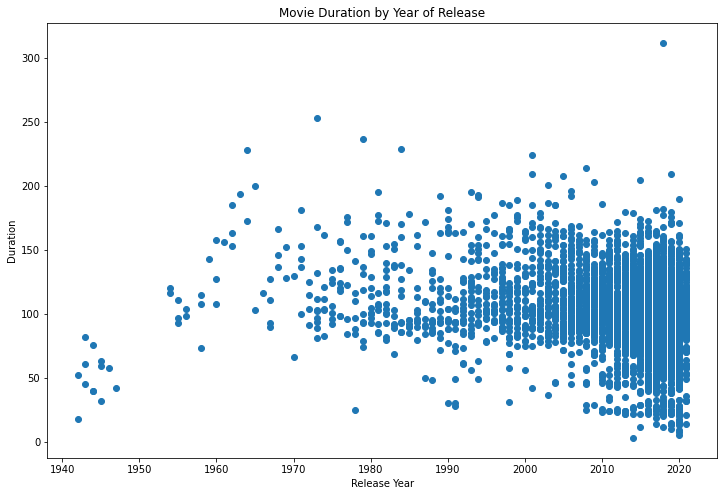

In [15]:
#visualize using scatterplot
#set the fig size
fig = plt.figure(figsize=(12,8))

plt.scatter(net_movies_col.release_year, net_movies_col.duration)
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Movie Duration by Year of Release')
plt.show()

Have an idea of movies shorter than 60 minutes

In [16]:
#Filter for movies shorter than 60 minutes
short_movies = net_movies_col[net_movies_col.duration < 60]
print(short_movies.head())

                                    title               country  release_year  \
279  Monster Hunter: Legends of the Guild  United States, Japan          2021   
694                                 Aziza        Lebanon, Syria          2019   
766               Alan Saldaña: Locked Up                Mexico          2021   
769              From Stress to Happiness             Argentina          2020   
975      Shadow and Bone - The Afterparty         United States          2021   

     duration  
279        59  
694        13  
766        49  
769        58  
975        33  


In [17]:
#visualize using correlation matrix
#To get a pictorial representation to understand the correlation between columns
corr = net_movies_col.corr()

corr.style.background_gradient(cmap='coolwarm')

,release_year,duration
release_year,1.000000,-0.196352
duration,-0.196352,1.000000


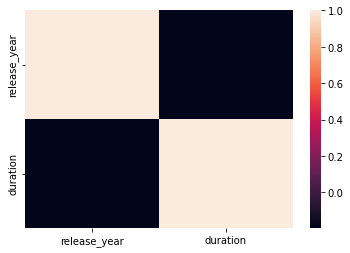

In [18]:
#visualize with seaborn heatmap
import seaborn as sns
sns.heatmap(net_movies_col.corr());

Countries that Produced Most Movies Per Year